In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Salary_dataset.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.head())

   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


Text(0, 0.5, 'salary')

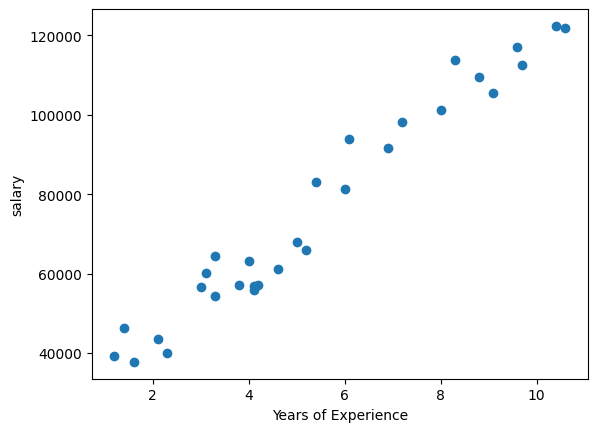

In [4]:
#scatter plot
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('salary')

In [5]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


this shows the relation between the two features how they very with each other , they are almost linearly related so we can use linear regression here

now segerate into dependent and independent features to train the model


In [6]:
X = df['YearsExperience']
print(X.head())
type(X)

0    1.2
1    1.4
2    1.6
3    2.1
4    2.3
Name: YearsExperience, dtype: float64


pandas.core.series.Series

problem with this is we get series not dataframe which we wanted so to solve this 

In [7]:
X=df[['YearsExperience']]
type(X)

pandas.core.frame.DataFrame

now the independent feature is a dataframe , the independent features shoudl be either dataframe or 2d array

the dependent feature can be in series as it is a regression problem , the independent maybe many so it must be in 2d array or df

In [8]:
y=df['Salary']


now splitting the data for training and testing

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)


In [11]:
xtrain.shape


(24, 1)

STANDARDIZATION - to keep all the features in the same range , done using z score = datapoint - mean / standard deviation 

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


differece between fit transform and transform is in transform it uses sd and mean of the train dataitself and in fir transform it calculates its mean and sd first , we dont want data leakage to happen that is we dont want the train data to know anything about test data , when model sees test data is should be like new data


In [17]:
##applying linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [22]:
regression.coef_


array([27151.53742583])

one unit moment in the x axis increase 27k in y 

In [23]:
regression.intercept_

np.float64(74208.625)

even after standardizing using zscore the values of coef and intercept are in thousands because we only standarsized x values which is very common , because we can have multiple independent features(inputs) and they need to be in same range not the actual output


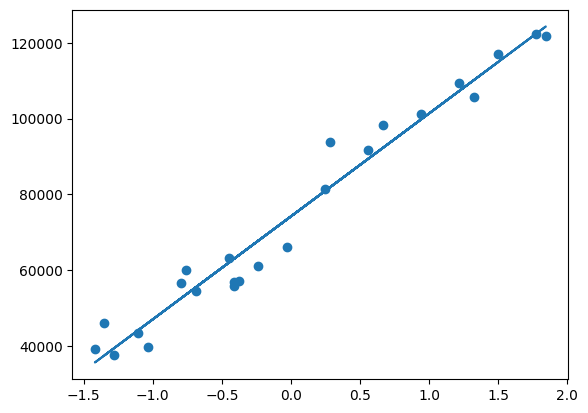

In [24]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,regression.predict(xtrain))

In [25]:
#predection for the test data
ypred = regression.predict(xtest)

In [27]:
#evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(ytest,ypred)
mae = mean_absolute_error(ytest,ypred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

49830096.85590833
6286.453830757741
7059.0436219015055


In [28]:
from sklearn.metrics import r2_score
score = r2_score(ytest,ypred)
print(score)

0.9024461774180499
